<a href="https://colab.research.google.com/github/EmaJuarezDev/CD-1C2025/blob/main/EXCEL_DECISION_TREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Práctico

#### 01-3900 | Ciencia de datos | 2025

Alumno: Franco Garcete

## Enunciado

Se tienen un dataset con datos de pacientes internados en un hospital (TP_Virus_Alumnos.csv). La clase de interes (1) refiere a la presencia de un virus. El virus tiene normalmente una gravedad leve/baja y el tratamiento suele ser invasivo. Datos como nombre y apellido han sido eliminados y los valores tanto en sangre (BLD), hormonales u otros análisis sobre reactivos han sido alterados en sus valores para preservar la privacidad. Se aclara que no se ha modificado su capacidad predictiva (Si es que la tienen).


Para su conocimiento: </BR>
Datos generales de Edad, Peso, Altura y condición laboral (Activo, Pasivo etc).
Datos medidos en hospital:</BR>
BLD: Sangre</BR>
LVL: Hormonales</BR>
REC: Otros análisis</BR>

Se pide obtener con los datos disponibles el mejor modelo posible que prediga la presencia o ausencia del virus.
Dado que el tratamiento es invasivo y la grevedad es moderada se requiere "atrapar" tantos "1" como sea posible y minimizar los falsos positivos para evitar que reciban un tratamiento de estas caracteristicas personas que no presentan el virus. Intente obtener el mejor modelo que maximice la métrica que considere correspondiente.



## Como desarrollar el exámen

A partir del dataset realice todas las acciones para poder llegar al mejor modelo, explique brevemente en los fundamentos de sus transformaciones o acciones en general.

La nota derivará de: </BR>
1.La calidad de la clasificación realizada</BR>
2.La fundamentación de los pasos realizados</BR>
3.Lo sencillo de llevar a producción el desarrollo</BR>



Los docentes evaluaran su clasificador utilizando un conjunto de datos del dataset "fuera de la caja" (out of the box, al que usted no tiene acceso). Para minimizar la posible diferencia entre su medición y la medición del docente recuerde y aplique conceptos de test, validación cruzada y evite los errores comunes de sesgo de selección y fuga de datos (Sklearn "10. Common pitfalls and recommended practices" disponible en "https://scikit-learn.org/stable/common_pitfalls.html)"   

Al final del notebook encontrará un bloque de código que lee la muestra adicional (a la que usted no tiene acceso) si PRODUCCION==True, en caso contrario solo lee una submuestra del conjunto original para validar que el código funciona. Desarrolle el notebook como considere para finalmente asignar el mejor clasificador o pipeline que usted haya obtenido remplazando en f_clf = None, None por su clasificador o pipeline. Si no utiliza un pipeline, implemente todas las transformaciones entre esa línea y la predicción final.

Persista modelos si realiza procesos que demoren (Mas de 10 minutos es mucho), alternativamente si quiere realizar búsquedas exhaustivas de hiperparametros o variables explicite el procedimiento y luego utilice los valores obtenidos para ajustar un clasificador/regresor y que los tiempos sean posibles en la corrección. Todas las herramientas vistas en clase están disponibles. Verifique que los docentes pueden ejecutar su clasificador / regresor usando el código adjunto y los datos "fuera de la caja" para validar la calidad su modelo.  

En materiales del MIEL/GIT se adjuntan un notebooks con algunas ideas para automatizar el proceso (Pipelines/Transformadores customizados).

# Análisis Exploratorio


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split



In [ ]:
df_virus = pd.read_csv("https://raw.githubusercontent.com/Franxx20/ciencia-de-datos-tp-parcial/refs/heads/main/TP_Virus_Alumnos.csv", sep=",")
df_virus.head(5)

,Edad,Genero,Peso,Laboral,hijos,BLD01,REC1,REC2,REC3,REC4,REC5,BLD02,BLD03,LVL,target
0,9.0,Femenino,36.410602,Inactivo,0,3.139714,6.929112,63.712640,73.880613,15.087239,90.400193,2.015331,1.633836,51.411632,0
1,58.0,Masculino,115.507184,Inactivo,4,2.953914,4.660136,64.582610,73.669319,14.503106,90.817947,0.973317,-0.439358,1000000.000000,0
2,74.0,Masculino,81.249035,Activo,3,1.365200,3.005861,63.613454,75.103984,14.077988,91.741638,3.243344,0.380413,1000000.000000,1
3,NaN,Masculino,77.985589,No_declara,0,2.329285,4.344642,64.433115,73.402436,15.583846,91.741709,3.188290,-0.226046,NaN,0
4,1.0,Femenino,13.446208,Inactivo,0,-0.062975,3.938741,65.122602,75.007982,16.961593,90.668625,2.729202,0.589698,21.627303,1


In [ ]:
# Verificamos los tipos de datos del dataframe
df_virus.dtypes
# Genero y Laboral son del tipo objeto por lo tanto por algun motivo pandas no ha sido capaz de clasificarlos, deberemos modificar esto mas adelante.

,0
Edad,float64
Genero,object
Peso,float64
Laboral,object
hijos,int64
BLD01,float64
REC1,float64
REC2,float64
REC3,float64
REC4,float64


In [ ]:
print("Tamaño del dataframe : {}".format(df_virus.shape))

Tamaño del dataframe : (4200, 15)


In [ ]:
print("Porcentaje de valores nulos por atributo:")
print((df_virus.isnull().sum()/len(df_virus)*100).sort_values(ascending=False))

# podemos ver que Genero, Edad y LVL poseen una gran cantidad de valores nulos. Como primera aproximacion probaremos con eleminar todos los registros con valores nulos.


Porcentaje de valores nulos por atributo:
Genero     40.047619
Edad       19.571429
LVL        12.547619
Laboral     0.000000
hijos       0.000000
BLD01       0.000000
Peso        0.000000
REC1        0.000000
REC2        0.000000
REC4        0.000000
REC3        0.000000
REC5        0.000000
BLD02       0.000000
BLD03       0.000000
target      0.000000
dtype: float64


In [ ]:
print("Valores mínimos y máximos de edad:")
print(f"Mínimo: {df_virus['Edad'].min()}")
print(f"Máximo: {df_virus['Edad'].max()}")

print("Valores mínimos y máximos de LVL:")
print(f"Mínimo: {df_virus['LVL'].min()}")
print(f"Máximo: {df_virus['LVL'].max()}")


print("\nValores únicos de laboral:")
print(df_virus['Laboral'].unique())
print(df_virus['Laboral'].value_counts())
print("\nValores únicos de Genero:")
print(df_virus['Genero'].unique())
print(df_virus['Genero'].value_counts())

Valores mínimos y máximos de edad:
Mínimo: 0.0
Máximo: 79.0
Valores mínimos y máximos de LVL:
Mínimo: -15.793610073901403
Máximo: 1000000.0

Valores únicos de laboral:
['Inactivo' 'Activo' 'No_declara']
Laboral
Inactivo      2088
Activo        1790
No_declara     322
Name: count, dtype: int64

Valores únicos de Genero:
['Femenino' 'Masculino' nan 'Otro']
Genero
Masculino    2159
Femenino      320
Otro           39
Name: count, dtype: int64


In [ ]:
# prompt: input Edad and LVL to avoid nulls. Use IterativeImputer for Edad and KNNInputer or LVL

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

# Impute missing values for 'Edad' using IterativeImputer
iterative_imputer = IterativeImputer(max_iter=10, random_state=0, n_nearest_features=2)
df_virus['Edad'] = iterative_imputer.fit_transform(df_virus[['Edad']])

# Impute missing values for 'LVL' using KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df_virus['LVL'] = knn_imputer.fit_transform(df_virus[['LVL']])

print("Porcentaje de valores nulos después de la imputación:")
print((df_virus.isnull().sum()/len(df_virus)*100).sort_values(ascending=False))


Porcentaje de valores nulos después de la imputación:
Genero     40.047619
Edad        0.000000
Peso        0.000000
Laboral     0.000000
hijos       0.000000
BLD01       0.000000
REC1        0.000000
REC2        0.000000
REC3        0.000000
REC4        0.000000
REC5        0.000000
BLD02       0.000000
BLD03       0.000000
LVL         0.000000
target      0.000000
dtype: float64


In [ ]:
# # prompt: input Edad and LVL to avoid nulls. Use SimpleImputer for Edad and KNNInputer or LVL

# from sklearn.impute import SimpleImputer, KNNImputer
# import numpy as np

# # Impute 'Edad' using SimpleImputer (e.g., with the mean)
# imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# df_virus['Edad'] = imputer_mean.fit_transform(df_virus[['Edad']])

# # Impute 'LVL' using KNNImputer
# imputer_knn = KNNImputer(n_neighbors=5) # You can adjust the number of neighbors
# df_virus['LVL'] = imputer_knn.fit_transform(df_virus[['LVL']])

# # Verify that nulls have been handled
# print("\nPorcentaje de valores nulos por atributo after imputation:")
# print((df_virus.isnull().sum()/len(df_virus)*100).sort_values(ascending=False))

In [ ]:
df_virus.drop(columns=['Genero'], inplace=True)

In [ ]:
df_virus = df_virus.dropna()
print("Tamaño del dataframe luego de eliminar valores nulos : {}".format(df_virus.shape))
# df_virus = df_virus[df_virus['Genero'] != 'Otro']
print("Tamaño del dataframe luego de eliminar registros con genero Otro : {}".format(df_virus.shape))

# como podemos ver ahora poseemos una cantidad mucho menos de registros de entrenamiento. Si el nivel de precision final de entrenamiento es insuficiente probaremos con otra estrategia de imputacion mas personalizada

Tamaño del dataframe luego de eliminar valores nulos : (4200, 14)
Tamaño del dataframe luego de eliminar registros con genero Otro : (4200, 14)


In [ ]:
df_virus["Edad"] = df_virus["Edad"].astype(int)
df_virus.dtypes

,0
Edad,int64
Peso,float64
Laboral,object
hijos,int64
BLD01,float64
REC1,float64
REC2,float64
REC3,float64
REC4,float64
REC5,float64


target
0    2493
1    1707
Name: count, dtype: int64


<Axes: xlabel='target', ylabel='count'>

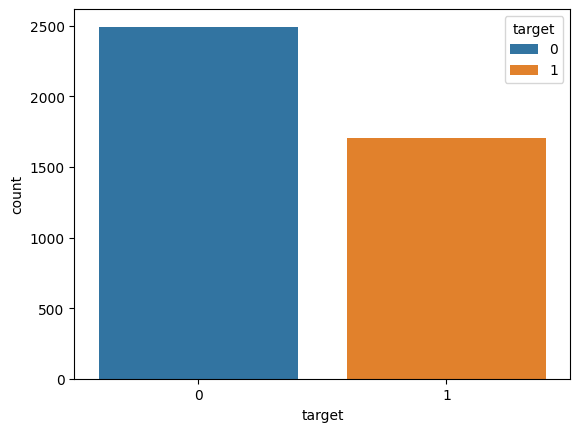

In [ ]:
# Analisis de la distribucion de la variabel target
print(df_virus['target'].value_counts())
sns.countplot(x='target', data=df_virus, hue='target', legend="full")


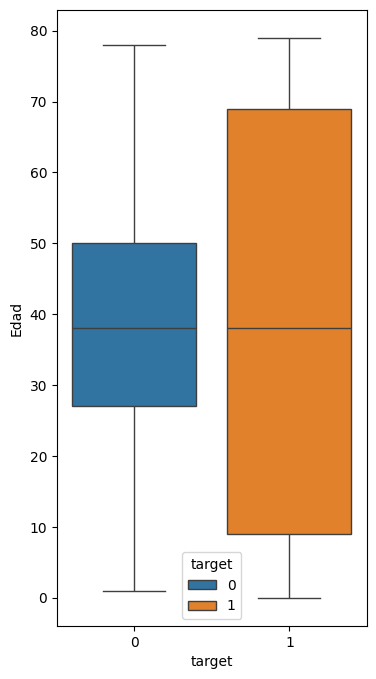

In [ ]:
plt.figure(figsize=(4, 8))
s = sns.boxplot(x='target', y='Edad', data=df_virus, hue="target", legend="full")

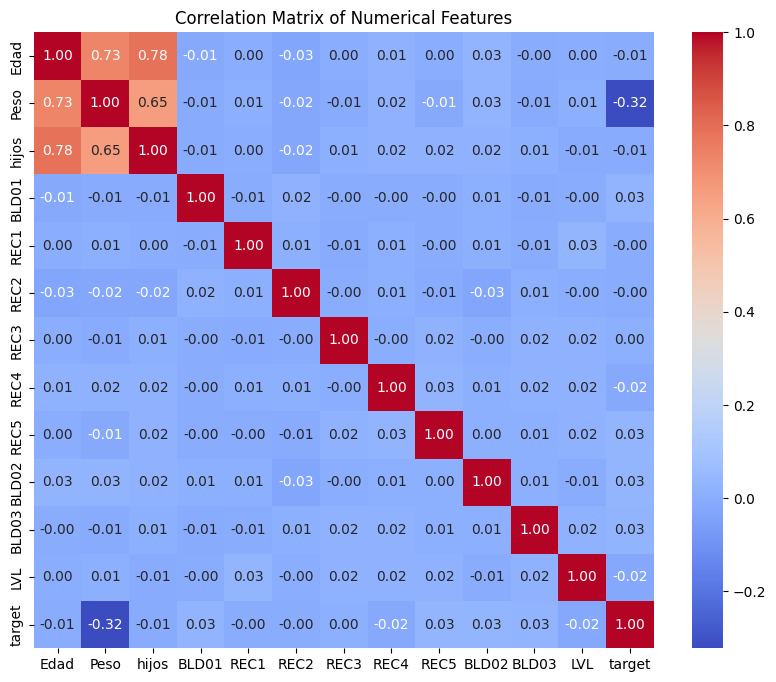

In [ ]:
import matplotlib.pyplot as plt
corr_matrix = df_virus.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
sns.pairplot(df_virus, hue='target')
plt.show()

NameError: name 'sns' is not defined

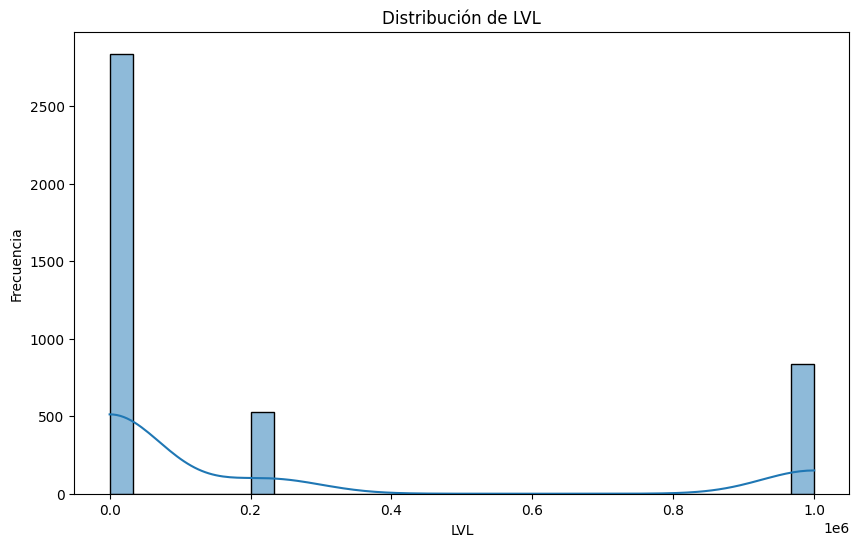

In [ ]:
# prompt: generate a histogram of LVL

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df_virus['LVL'], kde=True, bins=30)
plt.title('Distribución de LVL')
plt.xlabel('LVL')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# prompt: generate a graph that could show how the LVL values are distributed

import matplotlib.pyplot as plt
# Visualize the distribution of LVL
plt.figure(figsize=(10, 6))
sns.histplot(df_virus['LVL'], kde=True, bins=30)
plt.title('Distribution of LVL Values')
plt.xlabel('LVL')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=df_virus['LVL'])
plt.title('Boxplot of LVL Values')
plt.ylabel('LVL')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(y=df_virus['LVL'])
plt.title('Violin Plot of LVL Values')
plt.ylabel('LVL')
plt.show()

NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# onehot_encoder = OneHotEncoder(sparse_output=False)

# # Fit and transform the 'Genero' and 'Laboral' columns
# # Ensure the columns are treated as categorical by passing them as a list of lists or a DataFrame
# encoded_features = onehot_encoder.fit_transform(df_virus[['Genero', 'Laboral']])

# # Create a DataFrame from the encoded features with appropriate column names
# # Get feature names after encoding
# feature_names = onehot_encoder.get_feature_names_out(['Genero', 'Laboral'])
# encoded_df = pd.DataFrame(encoded_features, columns=feature_names, index=df_virus.index)

# # Concatenate the original dataframe with the encoded features
# df_virus = pd.concat([df_virus, encoded_df], axis=1)

# # Drop the original 'Genero' and 'Laboral' columns
# df_virus = df_virus.drop(['Genero', 'Laboral'], axis=1)


# print(df_virus.head())

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the 'Genero' and 'Laboral' columns
# Ensure the columns are treated as categorical by passing them as a list of lists or a DataFrame
encoded_features = onehot_encoder.fit_transform(df_virus[['Laboral']])

# Create a DataFrame from the encoded features with appropriate column names
# Get feature names after encoding
feature_names = onehot_encoder.get_feature_names_out(['Laboral'])
encoded_df = pd.DataFrame(encoded_features, columns=feature_names, index=df_virus.index)

# Concatenate the original dataframe with the encoded features
df_virus = pd.concat([df_virus, encoded_df], axis=1)

# Drop the original 'Genero' and 'Laboral' columns
df_virus = df_virus.drop(['Laboral'], axis=1)


print(df_virus.head())

   Edad        Peso  hijos     BLD01      REC1       REC2       REC3  \
0     9   36.410602      0  3.139714  6.929112  63.712640  73.880613   
1    58  115.507184      4  2.953914  4.660136  64.582610  73.669319   
2    74   81.249035      3  1.365200  3.005861  63.613454  75.103984   
3    38   77.985589      0  2.329285  4.344642  64.433115  73.402436   
4     1   13.446208      0 -0.062975  3.938741  65.122602  75.007982   

        REC4       REC5     BLD02     BLD03             LVL  target  \
0  15.087239  90.400193  2.015331  1.633836       51.411632       0   
1  14.503106  90.817947  0.973317 -0.439358  1000000.000000       0   
2  14.077988  91.741638  3.243344  0.380413  1000000.000000       1   
3  15.583846  91.741709  3.188290 -0.226046   227134.359847       0   
4  16.961593  90.668625  2.729202  0.589698       21.627303       1   

   Laboral_Activo  Laboral_Inactivo  Laboral_No_declara  
0             0.0               1.0                 0.0  
1             0.0       

In [ ]:
# prompt: show me how many rows hold a value of lvl from min value to 0.2, from 0.7 to highest value and the inbeetwen

# Define the thresholds
min_lvl = df_virus['LVL'].min()
max_lvl = df_virus['LVL'].max()
threshold1 = 0.2 * 1000000
threshold2 = 0.7 * 1000000

# Count rows in each range
count_min_to_0_2 = df_virus[(df_virus['LVL'] <= threshold1)].shape[0]
count_0_7_to_max = df_virus[(df_virus['LVL'] >= threshold2)].shape[0]
count_between = df_virus[(df_virus['LVL'] > threshold1) & (df_virus['LVL'] < threshold2)].shape[0]

# Print the counts
print(f"Number of rows with LVL between {min_lvl} and {threshold1}: {count_min_to_0_2}")
print(f"Number of rows with LVL between {threshold2} and {max_lvl}: {count_0_7_to_max}")
print(f"Number of rows with LVL between {threshold1} and {threshold2}: {count_between}")

Number of rows with LVL between -15.793610073901403 and 200000.0: 2839
Number of rows with LVL between 700000.0 and 1000000.0: 834
Number of rows with LVL between 200000.0 and 700000.0: 527


In [ ]:
# prompt: replace the column lvl with binding using the thresholds obtained before and apply one hot encoding to it

import pandas as pd
# Replace the 'LVL' column with 'binding' based on thresholds
def categorize_lvl(lvl):
  if lvl <= threshold1:
    return 'low'
  elif lvl >= threshold2:
    return 'high'
  else:
    return 'medium'

df_virus['binding'] = df_virus['LVL'].apply(categorize_lvl)

# Drop the original 'LVL' column
df_virus = df_virus.drop('LVL', axis=1)

# Apply one-hot encoding to the new 'binding' column
onehot_encoder_binding = OneHotEncoder(sparse_output=False)
encoded_binding = onehot_encoder_binding.fit_transform(df_virus[['binding']])
binding_feature_names = onehot_encoder_binding.get_feature_names_out(['binding'])
encoded_binding_df = pd.DataFrame(encoded_binding, columns=binding_feature_names, index=df_virus.index)

# Concatenate the original dataframe with the encoded binding column
df_virus = pd.concat([df_virus, encoded_binding_df], axis=1)

# Drop the original 'binding' column
df_virus = df_virus.drop('binding', axis=1)

print(df_virus.head())
df_virus.columns


   Edad        Peso  hijos     BLD01      REC1       REC2       REC3  \
0     9   36.410602      0  3.139714  6.929112  63.712640  73.880613   
1    58  115.507184      4  2.953914  4.660136  64.582610  73.669319   
2    74   81.249035      3  1.365200  3.005861  63.613454  75.103984   
3    38   77.985589      0  2.329285  4.344642  64.433115  73.402436   
4     1   13.446208      0 -0.062975  3.938741  65.122602  75.007982   

        REC4       REC5     BLD02     BLD03  target  Laboral_Activo  \
0  15.087239  90.400193  2.015331  1.633836       0             0.0   
1  14.503106  90.817947  0.973317 -0.439358       0             0.0   
2  14.077988  91.741638  3.243344  0.380413       1             1.0   
3  15.583846  91.741709  3.188290 -0.226046       0             0.0   
4  16.961593  90.668625  2.729202  0.589698       1             0.0   

   Laboral_Inactivo  Laboral_No_declara  binding_high  binding_low  \
0               1.0                 0.0           0.0          1.0   


Index(['Edad', 'Peso', 'hijos', 'BLD01', 'REC1', 'REC2', 'REC3', 'REC4',
       'REC5', 'BLD02', 'BLD03', 'target', 'Laboral_Activo',
       'Laboral_Inactivo', 'Laboral_No_declara', 'binding_high', 'binding_low',
       'binding_medium'],
      dtype='object')

In [ ]:
#df_virus = df_virus.drop(['LVL'], axis=1)

# Entrenamiento por decision tree


In [ ]:
x = df_virus.drop("target", axis=1)
y = df_virus["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify = y, random_state=42)

x.head(5)

,Edad,Peso,hijos,BLD01,REC1,REC2,REC3,REC4,REC5,BLD02,BLD03,Laboral_Activo,Laboral_Inactivo,Laboral_No_declara,binding_high,binding_low,binding_medium
0,9,36.410602,0,3.139714,6.929112,63.712640,73.880613,15.087239,90.400193,2.015331,1.633836,0.0,1.0,0.0,0.0,1.0,0.0
1,58,115.507184,4,2.953914,4.660136,64.582610,73.669319,14.503106,90.817947,0.973317,-0.439358,0.0,1.0,0.0,1.0,0.0,0.0
2,74,81.249035,3,1.365200,3.005861,63.613454,75.103984,14.077988,91.741638,3.243344,0.380413,1.0,0.0,0.0,1.0,0.0,0.0
3,38,77.985589,0,2.329285,4.344642,64.433115,73.402436,15.583846,91.741709,3.188290,-0.226046,0.0,0.0,1.0,0.0,0.0,1.0
4,1,13.446208,0,-0.062975,3.938741,65.122602,75.007982,16.961593,90.668625,2.729202,0.589698,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# prompt: implement decision tree with hyperparameter optimization.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, precision_score

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the scoring metric (F1-score is often suitable for imbalanced classes)
# Since we want to minimize false positives and maximize catching positives,
# F1-score is a reasonable metric as it balances precision and recall.
# You could also consider using roc_auc or recall, depending on the exact
# business requirements.
f1_scorer = make_scorer(f1_score)


# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid,
                           scoring=f1_scorer, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best F1-score (cross-validation):", best_score)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_dt_model.predict(x_test)

# Calculate F1-score on the test set
test_f1_score = f1_score(y_test, y_pred)
print("F1-score on the test set:", test_f1_score)

# Assign the best model to the f_clf variable (as required by the exam structure)
f_clf = best_dt_model


Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best F1-score (cross-validation): 0.7786106042193169
F1-score on the test set: 0.6770601336302895


In [ ]:
# prompt: implement decision tree with hyperparameter optimization for precision

# Define the scoring metric for precision
precision_scorer = make_scorer(precision_score)

# Create the GridSearchCV object for precision
grid_search_precision = GridSearchCV(estimator=dt_classifier, param_grid=param_grid,
                                    scoring=precision_scorer, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the training data for precision optimization
grid_search_precision.fit(x_train, y_train)

# Get the best parameters and the best score for precision
best_params_precision = grid_search_precision.best_params_
best_score_precision = grid_search_precision.best_score_

print("\nBest Hyperparameters for Precision:", best_params_precision)
print("Best Precision (cross-validation):", best_score_precision)

# Get the best model for precision
best_dt_model_precision = grid_search_precision.best_estimator_

# Evaluate the best precision model on the test set
y_pred_precision = best_dt_model_precision.predict(x_test)

# Calculate Precision on the test set
test_precision_score = precision_score(y_test, y_pred_precision)
print("Precision on the test set:", test_precision_score)

# If maximizing precision is the primary goal, assign this model to f_clf
# If there's a balance needed, you might stick with the F1 optimized model or
# perform a trade-off analysis. Based on the problem description emphasizing
# minimizing false positives, optimizing for precision directly seems appropriate.
f_clf = best_dt_model_precision


Fitting 5 folds for each of 160 candidates, totalling 800 fits

Best Hyperparameters for Precision: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Precision (cross-validation): 0.7786106042193169
Precision on the test set: 0.7875647668393783


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       748
           1       0.79      0.59      0.68       512

    accuracy                           0.77      1260
   macro avg       0.77      0.74      0.75      1260
weighted avg       0.77      0.77      0.76      1260



## Evaluacion final - Docente + Alumno




In [ ]:
# import pandas as pd
# from sklearn.metrics import classification_report
# from sklearn.model_selection import train_test_split

# PRODUCCION = False
# best_clf = None #Asignar aqui el mejor clasificador/pipeline posible (previamente entrenado si es necesario)

# #Leemos el dataset de evaluación, simulando producción
# if PRODUCCION==False:
#     df = pd.read_csv("TP_Virus_Alumnos.csv")
#     _, df = train_test_split(df, test_size=0.3, random_state=42)
# else:
#     df = pd.read_csv("TP_Virus_Evaluacion.csv")
# #Dividimos en target y predictoras

# X_prod = df.drop("target", axis=1)
# y_prod = df["target"]

# #Transformaciones en caso de no ser un pipeline completo. Preferiblemente, el mejor pipeline debe incluir todas las transformaciones necesarias.
# #Si es pipeline ejecutar el fit (tener en cuenta el tiempo). Si mediante exploración / busqueda exhaustiva se encontró el mejor clasificador
# #harcodear sus hiperparametros (Adjuntar código y explicación de como se encontró el mejor clasificador).

# #Evaluación final
# y_pred = best_clf.predict(X_prod)
# print(classification_report(y_prod, y_pred))